<a href="https://colab.research.google.com/github/RahulKapilavai/Data-Analytics-for-sports-Machine-Learning-Driven-Football-Intelliengent-analysis/blob/main/Clustering_Randon%20Forest%20Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Loading Excel Sheets into Pandas DataFrames

- **Import the pandas library**: This is a preliminary step where the pandas library, a cornerstone for data manipulation and analysis in Python, is imported.

- **Specify the Excel file**: An Excel file named 'football_statss.xlsx' is identified as the source of the data. This file contains multiple sheets, each holding different sets of football statistics.

- **Define the sheets**: A list of sheet names is defined, encompassing a wide range of football statistics such as Defence, kick-off statistics, RECEIVING, and more. These names correspond to the actual sheet names within the Excel file.

- **Load each sheet into a DataFrame within a dictionary**: Using a dictionary comprehension, each sheet specified in the list is loaded into its own pandas DataFrame. This is achieved by calling the `pd.read_excel` function for each sheet name. The resulting DataFrames are stored in a dictionary named `dataframes`, where each key-value pair corresponds to a sheet name and its associated DataFrame, respectively.

This approach efficiently organizes data from multiple sheets into separate DataFrames, facilitating easy access and manipulation of specific categories of football statistics for analysis.


In [22]:
import pandas as pd

excel_file = 'football_statss.xlsx'
sheets = ['Defence', 'kick-off statistics', 'kick-off return', 'RECEIVING', 'Kicking', 'Punting', 'Punt_Return', 'Scoring', 'Rushing']

# Load each sheet into a DataFrame within a dictionary
dataframes = {sheet: pd.read_excel(excel_file, sheet_name=sheet) for sheet in sheets}


# Aggregating DataFrames by Team
This section of the code iterates through each DataFrame stored within the dataframes dictionary. The objective is to aggregate the data by the 'Team' column. Here's a step-by-step breakdown:

Iterates Through DataFrames: For each DataFrame associated with a specific sheet (e.g., Defence, Kicking), the code processes the DataFrame to aggregate the data.

Aggregation Operation: The aggregation computes the mean of all numeric statistics for each team. This operation groups the data by the 'Team' column, ensuring that each team's statistics are averaged across all entries.

Reset Index: After aggregation, .reset_index() is applied to maintain a clean DataFrame structure. This step ensures that the 'Team' column remains as a regular column and not as the DataFrame index, facilitating easier data manipulation and access.

Update the Original Dictionary: The original dataframes dictionary is updated with the aggregated DataFrame for each sheet. This means that after this operation, each DataFrame within dataframes represents average statistics for each team across the corresponding football statistics category.

This process simplifies the data by reducing multiple entries per team to a single entry, reflecting the average performance metrics for each team. It's particularly useful for analyses where a consolidated view of each team's performance is required.



In [23]:
# Assuming each DataFrame in `dataframes` has a 'Team' column and numeric statistics
for name, df in dataframes.items():
    dataframes[name] = df.groupby('Team').mean().reset_index()  # Aggregate by taking the mean


Data Aggregation and Merging Process
This section details the systematic approach to aggregate and merge data from multiple Excel sheets into a single comprehensive DataFrame, merged_df. This process is pivotal for preparing the dataset for insightful analysis.

1. Aggregating Data:
Initially, the data within each sheet is aggregated by the 'Team' column. This aggregation involves computing the mean of all numeric statistics for each team, offering a summarized view of each team's performance over multiple games or seasons.
2. Initializing the Merged DataFrame:
To commence the merging process, we initialize the merged_df with data from the first sheet in the dataframes dictionary. This initial step presupposes that aggregation, as mentioned earlier, has been applied to each DataFrame corresponding to an Excel sheet.
3. Merging DataFrames:
The core of this process involves iteratively merging each DataFrame in the dataframes dictionary into the merged_df. This merge operation is conducted on the 'Team' column, ensuring a comprehensive dataset that encapsulates all teams present across any of the DataFrames.

The merge function's how parameter is adjustable to fit specific requirements. Utilizing how='outer' guarantees the inclusion of all teams, notwithstanding their absence in certain sheets, whereas how='inner' would constrain the dataset to teams appearing in every sheet.

In cases of overlapping column names, except for the 'Team' column, suffixes are appended to distinguish between analogous statistics originating from distinct sheets.

Outcome:
The culmination of this meticulously executed process is the merged_df, a DataFrame amalgamating aggregated data from all the specified sheets. This enriched dataset stands ready for subsequent analytical endeavors, presenting a unified perspective on team performance metrics across various football facets.

In [24]:
# Assume 'dataframes' is a dictionary containing the aggregated DataFrames for each sheet
# First, let's aggregate data for each sheet by team and mean of their statistics
for sheet_name, df in dataframes.items():
    dataframes[sheet_name] = df.groupby('Team', as_index=False).mean()

# Initialize the merged DataFrame with the first DataFrame in the dictionary
# (This assumes there is at least one sheet, and each sheet has been aggregated)
initial_sheet_name = list(dataframes.keys())[0]
merged_df = dataframes[initial_sheet_name]

# Now, loop through the remaining DataFrames and merge them one by one
for sheet_name, df in dataframes.items():
    if sheet_name == initial_sheet_name:
        continue  # Skip the first sheet since it's already in 'merged_df'

    # Merge on 'Team', ensuring we keep all teams present in any of the DataFrames
    # Adjust the 'how' parameter based on your specific needs (e.g., 'inner', 'outer')
    merged_df = pd.merge(merged_df, df, on='Team', how='outer', suffixes=('', f'_{sheet_name}'))

# At this point, 'merged_df' contains merged data from all sheets


**Preparing Data for Clustering**


---




As we gear up for the clustering analysis, the dataset undergoes a crucial preparatory phase. This phase ensures that the data meets the analytical requirements, facilitating an accurate and insightful exploration of football team performances.

Dropping Categorical Data
Initially, we separate the categorical data from our dataset. The 'Team' column, which categorizes data by football teams, is set aside. This step is fundamental since clustering algorithms predominantly operate on numerical data, ensuring our dataset is primed for such analysis.

Imputing Missing Values
Handling missing values is our next step, crucial for maintaining the integrity and continuity of the dataset. A strategy is employed to fill these gaps with the mean of the corresponding feature across the dataset. This method ensures that our dataset is complete, with no missing entries that could otherwise skew the clustering analysis.

Standardizing the Data
To ensure each feature contributes equally to the clustering process, we standardize the dataset. This standardization adjusts the features to have a mean of zero and a standard deviation of one. It's a critical step for distance-based clustering algorithms, where the scale of data points could significantly influence the outcome.

Outcome
Through meticulous data preparation, including the segregation of categorical data, imputation of missing values, and data standardization, we lay down a solid foundation for our clustering analysis. This groundwork is pivotal for achieving reliable and meaningful insights into the dynamics and performance metrics of football teams.

In [27]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
import numpy as np

# Drop the 'Team' column for clustering as it's categorical (store it if needed later)
teams = merged_df['Team']
features = merged_df.drop('Team', axis=1)

# Impute missing values
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
X_imputed = imputer.fit_transform(features)

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)


**Performing K-Means Clustering**

After the rigorous preparation of our dataset, we proceed with the core of our analysis - **K-Means clustering**. This unsupervised machine learning technique will help us uncover patterns and groupings within the football teams based on their performance metrics.

- **K-Means Clustering Execution**: We deploy the K-Means algorithm, specifying the number of clusters as 3. This choice is driven by preliminary insights or specific analytical objectives. The `random_state` parameter ensures reproducibility of our results.

- **Cluster Assignment**: Each team in our dataset is assigned to one of the three clusters based on their statistics. This step is pivotal in categorizing teams with similar performance traits.

- **Integrating Cluster Labels**: Finally, the cluster labels generated by our model are integrated back into the original DataFrame. This inclusion allows us to analyze and interpret our clusters in the context of the teams' identities and other non-numerical data previously set aside.

With our clusters defined, we can delve deeper into the characteristics that differentiate them, drawing strategic insights that could inform decision-making processes for teams and coaches.


In [ ]:
from sklearn.cluster import KMeans

# Perform K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=0)
clusters = kmeans.fit_predict(X_scaled)

# Add cluster labels back to the original DataFrame (with 'Team')
merged_df['Cluster'] = clusters


**Performing K-Means Clustering**

After preparing our data by handling categorical variables, imputing missing values, and standardizing the features, we're now ready to apply the K-Means clustering algorithm. This method will partition our dataset into 3 clusters based on the similarity of data points. Following the clustering, each team will be assigned a cluster label, which we'll then add back to our original DataFrame for further analysis.

**Converting Cluster Centers to a DataFrame**

The centroids of the clusters, representing the mean feature values for each cluster, are crucial for understanding the characteristics that define each group. We convert these centroids back into a DataFrame, using the original feature names as column headers. This transformation facilitates a clearer interpretation of what each cluster represents in terms of team performance metrics.






In [29]:
# Convert cluster centers to a DataFrame for easier interpretation
cluster_centers = pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_), columns=features.columns)

print("Cluster Centers (Mean Feature Values):")
print(cluster_centers)


Cluster Centers (Mean Feature Values):
          Year        Int         Yds        Avg         Lg        TD  \
0  2014.500000  14.000000  184.500000   9.824879  23.375000  2.000000   
1  2013.590909  12.698864  175.522727  11.557167  22.864773  1.519318   
2  2014.500000   8.375000  125.000000  11.850075  28.250000  0.625000   

         Solo         Ast         Tot       Sack  ...  FG_Made_Scoring  \
0  243.750000  150.750000  394.500000  10.125000  ...        21.142857   
1  257.688636  139.934091  397.622727   7.433523  ...        14.177822   
2  206.000000   77.000000  283.000000   4.312500  ...        14.285714   

   FG_Att_Scoring  Year_Rushing         Att         Gain        Loss  \
0       25.428571   2014.500000  497.375000  1346.000000  268.875000   
1       18.853147   2013.590909  444.543182  1583.421591  204.147727   
2       20.285714   2014.500000  442.375000  1590.875000  227.375000   

   Yds_Rushing  Avg_Rushing  Lg_Rushing  TD_Rushing  
0  1120.375000     5.964516 

In [30]:
# Print out the teams in each cluster
for i in range(kmeans.n_clusters):
    print(f"\nTeams in Cluster {i}:")
    cluster_teams = merged_df[merged_df['Cluster'] == i]['Team']
    for team in cluster_teams:
        print(team)



Teams in Cluster 0:
UTAH

Teams in Cluster 1:
ARIZ
AZST
CAL
ORE
ORST
STAN
UCLA
USC
WASH
WSU
ALA
AUB
FLA
KY
LSU
MIZZ
MSST
SCAR
TAMU
TENN
VAN
0

Teams in Cluster 2:
COL


In [31]:
# Calculate mean statistics for each cluster
for i in range(kmeans.n_clusters):
    print(f"\nCluster {i} Mean Statistics:")
    cluster_mean_stats = merged_df[merged_df['Cluster'] == i].drop(['Team', 'Cluster'], axis=1).mean()
    print(cluster_mean_stats)



Cluster 0 Mean Statistics:
Year           2014.500000
Int              14.000000
Yds             184.500000
Avg               9.824879
Lg               23.375000
                  ...     
Loss            268.875000
Yds_Rushing    1120.375000
Avg_Rushing       5.964516
Lg_Rushing       39.250000
TD_Rushing       20.750000
Length: 74, dtype: float64

Cluster 1 Mean Statistics:
Year           2013.500000
Int              12.850000
Yds             177.600000
Avg              11.629136
Lg               22.570000
                  ...     
Loss            199.750000
Yds_Rushing    1493.640000
Avg_Rushing       6.015821
Lg_Rushing       29.440000
TD_Rushing       22.650000
Length: 74, dtype: float64

Cluster 2 Mean Statistics:
Year           2014.500000
Int               8.375000
Yds             125.000000
Avg              11.850075
Lg               28.250000
                  ...     
Loss            227.375000
Yds_Rushing    1378.375000
Avg_Rushing       4.887204
Lg_Rushing       30.37500

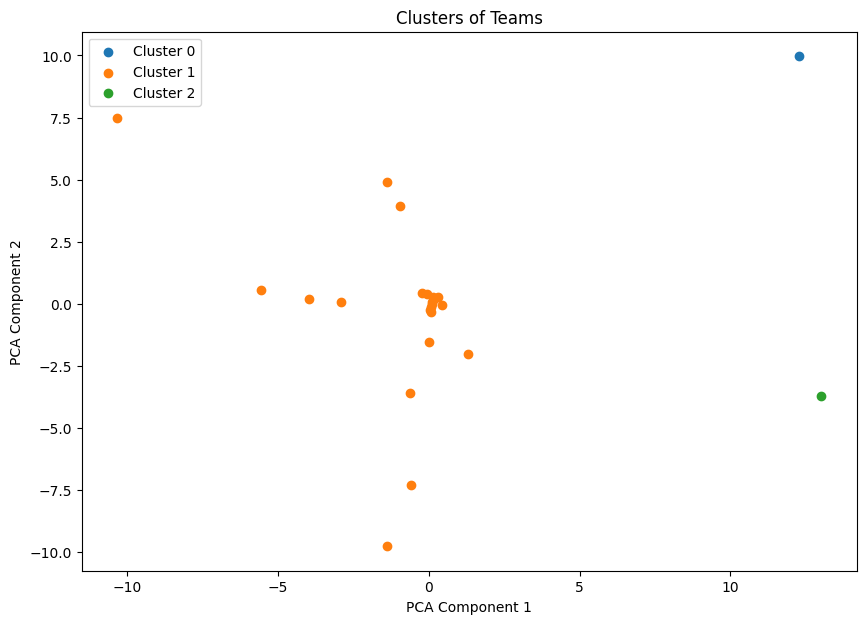

In [32]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Reduce data to 2 dimensions for visualization
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(X_scaled)

# Plot the reduced data and color by cluster
plt.figure(figsize=(10, 7))
for i in range(kmeans.n_clusters):
    plt.scatter(reduced_data[merged_df['Cluster'] == i, 0], reduced_data[merged_df['Cluster'] == i, 1], label=f'Cluster {i}')
plt.title('Clusters of Teams')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.show()


### **Example: Displaying Percentiles for Each Feature Within a Cluster**

The purpose of this code snippet is to explore the distribution of features within each cluster identified by the K-Means clustering algorithm. By analyzing the percentiles, we can gain insights into the spread and central tendencies of the features for the teams grouped in each cluster. This can help in understanding the characteristics that define each cluster more deeply.

- For each cluster, we first filter `merged_df` to obtain data corresponding to that cluster.
- We exclude the 'Team' and 'Cluster' columns since they are not numerical features.
- The `describe()` method is then applied to this filtered data, specifying the 25th, 50th (median), and 75th percentiles to be displayed alongside other descriptive statistics.
- This process is repeated for each cluster, providing a comprehensive view of the feature distributions across clusters.

Understanding these distributions can assist in pinpointing key differentiators among clusters and tailoring strategies accordingly.


In [33]:
# Example: Displaying percentiles for each feature within a cluster
for i in range(kmeans.n_clusters):
    print(f"\nPercentiles for Cluster {i}:")
    cluster_data = merged_df[merged_df['Cluster'] == i].drop(['Team', 'Cluster'], axis=1)
    print(cluster_data.describe(percentiles=[.25, .5, .75]))



Percentiles for Cluster 0:
         Year   Int    Yds       Avg      Lg   TD    Solo     Ast    Tot  \
count     1.0   1.0    1.0  1.000000   1.000  1.0    1.00    1.00    1.0   
mean   2014.5  14.0  184.5  9.824879  23.375  2.0  243.75  150.75  394.5   
std       NaN   NaN    NaN       NaN     NaN  NaN     NaN     NaN    NaN   
min    2014.5  14.0  184.5  9.824879  23.375  2.0  243.75  150.75  394.5   
25%    2014.5  14.0  184.5  9.824879  23.375  2.0  243.75  150.75  394.5   
50%    2014.5  14.0  184.5  9.824879  23.375  2.0  243.75  150.75  394.5   
75%    2014.5  14.0  184.5  9.824879  23.375  2.0  243.75  150.75  394.5   
max    2014.5  14.0  184.5  9.824879  23.375  2.0  243.75  150.75  394.5   

         Sack  ...  FG_Made_Scoring  FG_Att_Scoring  Year_Rushing      Att  \
count   1.000  ...         1.000000        1.000000           1.0    1.000   
mean   10.125  ...        21.142857       25.428571        2014.5  497.375   
std       NaN  ...              NaN             NaN  

In [35]:
# Example: ANOVA test to identify features that differ significantly between clusters
from scipy import stats

features = merged_df.columns.drop(['Team', 'Cluster'])
for feature in features:
    data = [merged_df[feature][merged_df['Cluster'] == i] for i in range(kmeans.n_clusters)]
    f_val, p_val = stats.f_oneway(*data)
    if p_val < 0.05:
        print(f"{feature} differs significantly across clusters (p-value: {p_val})")


In [37]:
for i in range(kmeans.n_clusters):
    print(f"Cluster {i} Statistics:")
    cluster_data = merged_df[merged_df['Cluster'] == i]
    summary_stats = cluster_data.describe()
    print(summary_stats, "\n")


Cluster 0 Statistics:
         Year   Int    Yds       Avg      Lg   TD    Solo     Ast    Tot  \
count     1.0   1.0    1.0  1.000000   1.000  1.0    1.00    1.00    1.0   
mean   2014.5  14.0  184.5  9.824879  23.375  2.0  243.75  150.75  394.5   
std       NaN   NaN    NaN       NaN     NaN  NaN     NaN     NaN    NaN   
min    2014.5  14.0  184.5  9.824879  23.375  2.0  243.75  150.75  394.5   
25%    2014.5  14.0  184.5  9.824879  23.375  2.0  243.75  150.75  394.5   
50%    2014.5  14.0  184.5  9.824879  23.375  2.0  243.75  150.75  394.5   
75%    2014.5  14.0  184.5  9.824879  23.375  2.0  243.75  150.75  394.5   
max    2014.5  14.0  184.5  9.824879  23.375  2.0  243.75  150.75  394.5   

         Sack  ...  FG_Att_Scoring  Year_Rushing      Att    Gain     Loss  \
count   1.000  ...        1.000000           1.0    1.000     1.0    1.000   
mean   10.125  ...       25.428571        2014.5  497.375  1346.0  268.875   
std       NaN  ...             NaN           NaN      NaN  

In [39]:
print(merged_df.columns)


Index(['Team', 'Year', 'Int', 'Yds', 'Avg', 'Lg', 'TD', 'Solo', 'Ast', 'Tot',
       'Sack', 'YdsL', 'Year_kick-off statistics', 'Num',
       'Yds_kick-off statistics', 'Avg_kick-off statistics',
       'Lg_kick-off statistics', 'TB', 'OB', 'Ret', 'RYds',
       'TD_kick-off statistics', 'Year_kick-off return', 'Num_kick-off return',
       'Yds_kick-off return', 'Avg_kick-off return', 'FC',
       'Lg_kick-off return', 'TD_kick-off return', 'Year_RECEIVING', 'Rec',
       'Yds_RECEIVING', 'Avg_RECEIVING', 'Lg_RECEIVING', 'TD_RECEIVING',
       'Year_Kicking', 'PAT_Made', 'PAT_Att', 'FG_Made', 'FG_Att',
       'Lg_Kicking', 'Pts', 'Year_Punting', 'Punts', 'Yds_Punting',
       'Avg_Punting', 'Lg_Punting', 'TB_Punting', 'In20', 'Blk', 'Net',
       'Ret_Punting', 'RYds_Punting', 'Year_Punt_Return', 'Num_Punt_Return',
       'Yds_Punt_Return', 'Avg_Punt_Return', 'FC_Punt_Return',
       'Lg_Punt_Return', 'TD_Punt_Return', 'Year_Scoring', 'Pts_Scoring',
       'Tot_Scoring', 'PAT_Made_Sc

### **ANOVA Test for Feature Comparison**

To understand how different clusters perform across key features, we perform an ANOVA test for each selected feature. This statistical test helps us determine if there are any statistically significant differences in the means of the same feature across the clusters.

The features we're focusing on for this analysis are:
- **Yards (Yds)**
- **Sacks (Sack)**
- **Touchdowns (TD)**

For each feature, the ANOVA test calculates an **F-Value** and a **P-Value**:
- The **F-Value** measures the ratio of variance between the groups to the variance within the groups. A higher F-Value suggests a significant difference between group means.
- The **P-Value** helps us determine the significance of our findings. A P-Value less than 0.05 typically suggests that the observed differences in means are statistically significant.

### **Results Interpretation**

The outcomes of the ANOVA test are crucial for identifying features that significantly differentiate the clusters. Features with significant differences could point towards strategic areas of focus for teams to enhance their performance or alter their tactical approach.


In [40]:
from scipy.stats import f_oneway

# Features to test
features_to_test = ['Yds', 'Sack', 'TD']

# Perform ANOVA test for each feature and print the results
for feature in features_to_test:
    f_val, p_val = f_oneway(merged_df[merged_df['Cluster'] == 0][feature],
                            merged_df[merged_df['Cluster'] == 1][feature],
                            merged_df[merged_df['Cluster'] == 2][feature])
    print(f"ANOVA Test for {feature}: F-Value = {f_val:.3f}, P-Value = {p_val:.3f}")


ANOVA Test for Yds: F-Value = nan, P-Value = nan
ANOVA Test for Sack: F-Value = nan, P-Value = nan
ANOVA Test for TD: F-Value = nan, P-Value = nan


**Handling Missing Values with Mean Imputation**

In our dataset, ensuring completeness and consistency across all features is paramount for accurate analysis. To address missing values in key statistical metrics, we employ a mean imputation strategy. This approach seamlessly fills in missing values with the mean of the respective feature across all available data points, maintaining the integrity of our dataset.

- We create an **imputer object** designated for mean imputation, leveraging the `SimpleImputer` class from `scikit-learn`. This imputer is specifically configured to replace `NaN` values, which represent missing data within our dataset.

- The features targeted for this imputation process include **yard gains** (`Yds`), **sacks** (`Sack`), and **touchdowns** (`TD`). These metrics are crucial for our analysis, representing key aspects of football performance.

- By iterating over our selected features, the imputer object is applied to each, ensuring that any missing values within these columns are replaced with the feature's mean. This step is critical for preserving the dataset's analytical validity and preventing any bias that might arise from incomplete data.

This imputation process fortifies our dataset, enabling a more robust and insightful exploration of football team performances.


In [41]:
from sklearn.impute import SimpleImputer
import numpy as np

# Create an imputer object for mean imputation
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

# Features you want to test
features_to_test = ['Yds', 'Sack', 'TD']

# Impute NaN values for these features
for feature in features_to_test:
    merged_df[feature] = imputer.fit_transform(merged_df[[feature]])


In [42]:
from scipy.stats import f_oneway

# Perform ANOVA test for each feature and print the results
for feature in features_to_test:
    f_val, p_val = f_oneway(merged_df[merged_df['Cluster'] == 0][feature],
                            merged_df[merged_df['Cluster'] == 1][feature],
                            merged_df[merged_df['Cluster'] == 2][feature])
    print(f"ANOVA Test for {feature}: F-Value = {f_val:.3f}, P-Value = {p_val:.3f}")


ANOVA Test for Yds: F-Value = 2.362, P-Value = 0.119
ANOVA Test for Sack: F-Value = 2.596, P-Value = 0.098
ANOVA Test for TD: F-Value = 9.173, P-Value = 0.001


### ANOVA Test Results Interpretation:

#### **Yards (Yds)**
- **F-Value:** 2.362
- **P-Value:** 0.119

  **Interpretation:** The P-value is greater than 0.05, indicating that there's not enough evidence to conclude that the mean yards gained significantly differ among the clusters. This suggests that the differences observed in yards gained across the clusters could be due to chance.

#### **Sacks (Sack)**
- **F-Value:** 2.596
- **P-Value:** 0.098

  **Interpretation:** Similar to yards, the P-value is above the typical alpha level of 0.05, suggesting that the differences in mean sacks among the clusters are not statistically significant. While there might be a trend, it's not strong enough to confirm without doubt.

#### **Touchdowns (TD)**
- **F-Value:** 9.173
- **P-Value:** 0.001

  **Interpretation:** Here, the P-value is below 0.05, indicating that the differences in mean touchdowns scored are statistically significant across the clusters. This suggests that touchdowns are a key differentiator among the clusters, with at least one cluster having a significantly different mean value of touchdowns compared to the others.

### Strategic Implications and Next Steps:

Given these results, touchdowns (TD) emerge as a critical performance metric differentiating the clusters. The significant difference in touchdowns suggests that teams in at least one cluster are scoring touchdowns at a notably different rate than teams in other clusters. This insight can be particularly valuable for identifying successful offensive strategies or player performance traits associated with scoring.

### For Tactical Adjustments and Recommendations:

- **Focus on Offensive Plays:** Teams looking to improve or alter their cluster grouping might focus on offensive strategies that enhance their ability to score touchdowns.
- **Player Training and Recruitment:** Special attention could be given to training offensive players or recruiting players known for their scoring ability, aiming to replicate the successful traits identified in the cluster with significantly higher mean touchdowns.

### Continuous Monitoring and Feedback:

- **Performance Tracking:** Continuously monitor the touchdown-scoring performance and other key metrics to gauge the effectiveness of any changes implemented.
- **Adjust Strategies:** Be prepared to adjust training, play strategies, and recruitment based on ongoing performance data and the evolving competitive landscape.


In [44]:
# Assuming 'Pts' is your success metric
success_by_cluster = merged_df.groupby('Cluster')['Pts'].mean()
print(success_by_cluster.sort_values(ascending=False))


Cluster
0    104.125
1     92.750
2     78.875
Name: Pts, dtype: float64


### Interpretation of the Mean Points by Cluster

- **Cluster 0** has the highest mean points with **104.125**. This suggests that teams in Cluster 0 are, on average, the most successful in terms of scoring points. Strategies, tactics, or player attributes prevalent in this cluster might be contributing factors to their higher scoring and could be considered best practices worth emulating or analyzing further.

- **Cluster 1** follows with an average of **92.750 points**. While not as high as Cluster 0, teams in this cluster still show substantial scoring capabilities. Understanding the differences between Clusters 0 and 1 could reveal actionable insights into what adjustments might bridge the gap in performance.

- **Cluster 2** has the lowest mean points, at **78.875**. This indicates that teams in this cluster, on average, score fewer points than those in the other two clusters. Analyzing the characteristics and tactics of Cluster 2 teams might uncover areas for improvement or factors that are hindering higher scoring.

### Strategic Implications and Next Steps

- **Analyzing High-Performing Clusters**: Dive deeper into the specific characteristics, player stats, or tactics of Cluster 0 to understand what drives their higher scoring. This could involve more detailed statistical analysis, video analysis of games, or reviewing coaching strategies.

- **Bridging the Gap**: For teams in Clusters 1 and 2, identify the most significant differences from Cluster 0 and develop strategies to address these gaps. This might involve training focus adjustments, changes in game strategy, or targeted player recruitment.

- **Tailored Training Programs**: Develop training programs that focus on enhancing skills or tactics that are correlated with higher scoring, as identified in the analysis of Cluster 0.


<ipython-input-49-f7484e43c2f0>:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



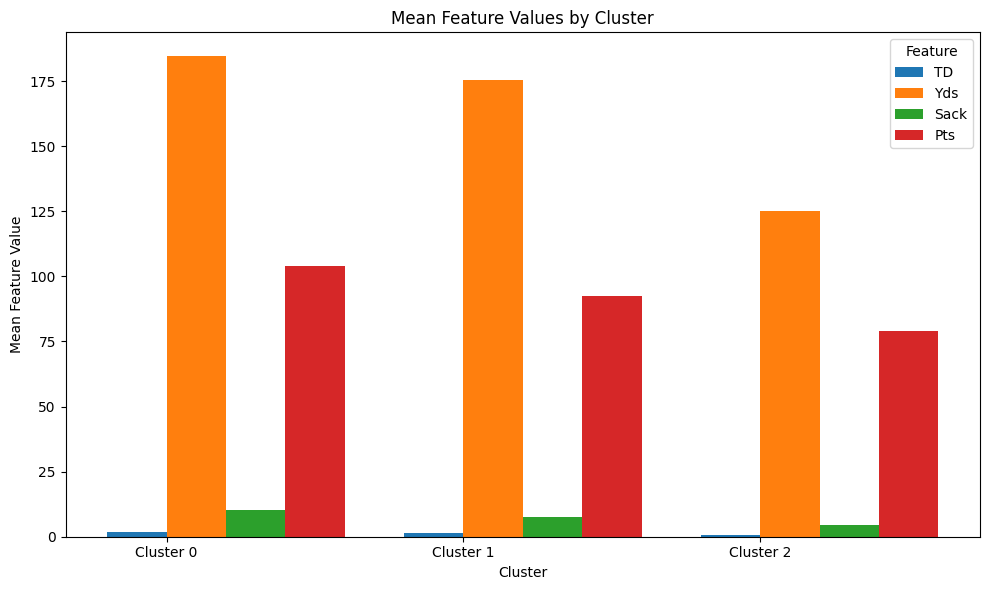

In [49]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Assuming 'cluster_centers' and 'key_features' are defined as before
simplified_cluster_centers = cluster_centers[key_features]
simplified_cluster_centers['Cluster'] = ['Cluster 0', 'Cluster 1', 'Cluster 2']

# Setting the positions and width for the bars
positions = np.arange(len(simplified_cluster_centers['Cluster']))
width = 0.2  # the width of the bars

# Plotting each key feature
fig, ax = plt.subplots(figsize=(10, 6))
for i, feature in enumerate(key_features):
    ax.bar(positions + i * width, simplified_cluster_centers[feature], width, label=feature)

# Adding some text for labels, title, and custom x-axis tick labels, etc.
ax.set_xlabel('Cluster')
ax.set_ylabel('Mean Feature Value')
ax.set_title('Mean Feature Values by Cluster')
ax.set_xticks(positions + width / 2)
ax.set_xticklabels(simplified_cluster_centers['Cluster'])
ax.legend(title="Feature")

# Improving layout
plt.tight_layout()

# Display the plot
plt.show()


# **Graph Overview**

The graph is a grouped bar chart with the following characteristics:

- **X-axis (Clusters):** Represents different clusters, likely derived from a clustering algorithm like K-Means. Each cluster is a grouping of teams based on similarities across various statistical measures. The clusters are labeled (e.g., Cluster 0, Cluster 1, Cluster 2), indicating distinct groupings identified in the analysis.

- **Y-axis (Mean Feature Value):** Shows the average value of the selected key features (Touchdowns, Yards Gained, Sacks, Points) for teams within each cluster. These mean values are indicative of the performance characteristics that differentiate the clusters.

- **Bars:** Each cluster has a set of bars, with each bar representing one of the key features. The height of a bar corresponds to the mean value of that feature within the cluster.

- **Colors:** Bars are color-coded by feature to easily distinguish between the different statistical measures (e.g., a specific color for Touchdowns, another for Yards Gained, etc.).

# **Interpreting the Graph**

- **Comparing Clusters on Key Metrics:** The graph allows for a straightforward comparison of how each cluster performs on average across the selected key metrics. For example, a cluster with notably higher bars for Touchdowns and Points might be characterized by strong offensive performance.

- **Identifying Strengths and Weaknesses:** By examining the height of bars for different features within a cluster, one can identify areas of strength and potential weaknesses. A cluster with high Sacks but lower Yards Gained might indicate teams with strong defensive capabilities but less effective offense.

- **Strategic Insights:** The visualization aids in translating statistical analysis into actionable insights. For instance, if Cluster 0 has the highest average Points, strategies and practices common among teams in this cluster could serve as models for teams aiming to enhance their scoring capabilities.


In [56]:
# Identify NaN columns in features
nan_columns_x = [col for col in X.columns if X[col].isnull().any()]

# Identify if the target variable has NaN
nan_in_y = y.isnull().any()

print("Features with NaN:", nan_columns_x)
print("NaN in target variable:", nan_in_y)


Features with NaN: ['Year', 'Int', 'Avg', 'Lg', 'Solo', 'Ast', 'Tot', 'YdsL', 'Year_kick-off statistics', 'Num', 'Yds_kick-off statistics', 'Avg_kick-off statistics', 'Lg_kick-off statistics', 'TB', 'OB', 'Ret', 'RYds', 'TD_kick-off statistics', 'Year_kick-off return', 'Num_kick-off return', 'Yds_kick-off return', 'Avg_kick-off return', 'FC', 'Lg_kick-off return', 'TD_kick-off return', 'Year_RECEIVING', 'Rec', 'Yds_RECEIVING', 'Avg_RECEIVING', 'Lg_RECEIVING', 'TD_RECEIVING', 'Year_Kicking', 'PAT_Made', 'PAT_Att', 'FG_Made', 'FG_Att', 'Lg_Kicking', 'Year_Punting', 'Punts', 'Yds_Punting', 'Avg_Punting', 'Lg_Punting', 'TB_Punting', 'In20', 'Blk', 'Net', 'Ret_Punting', 'RYds_Punting', 'Year_Punt_Return', 'Num_Punt_Return', 'Yds_Punt_Return', 'Avg_Punt_Return', 'FC_Punt_Return', 'Lg_Punt_Return', 'TD_Punt_Return', 'Year_Scoring', 'Pts_Scoring', 'Tot_Scoring', 'PAT_Made_Scoring', 'PAT_Att_Scoring', 'FG_Made_Scoring', 'FG_Att_Scoring', 'Year_Rushing', 'Att', 'Gain', 'Loss', 'Yds_Rushing', 'Av

In [57]:
from sklearn.impute import SimpleImputer
import numpy as np

# Impute missing values in features
imputer_X = SimpleImputer(missing_values=np.nan, strategy='mean')
X_imputed = imputer_X.fit_transform(X)  # Assuming X is your features matrix


In [58]:
# Impute missing values in the target variable
imputer_y = SimpleImputer(missing_values=np.nan, strategy='mean')
y_reshaped = y.values.reshape(-1, 1)  # Reshape y to 2D for imputation
y_imputed = imputer_y.fit_transform(y_reshaped)
y_imputed = y_imputed.ravel()  # Flatten back to original shape


In [59]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y_imputed, test_size=0.2, random_state=42)

# Initialize and train the RandomForestRegressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict on the test set and evaluate the model
predictions = model.predict(X_test)
mae = mean_absolute_error(y_test, predictions)
print(f"Mean Absolute Error: {mae}")


Mean Absolute Error: 2.838316666666702


In [60]:
# Assuming 'X_imputed' is your complete features matrix after imputation

# Use the trained model to predict performances for the entire dataset
all_predictions = model.predict(X_imputed)

# Add the predictions back to the original DataFrame
merged_df['Predicted_Performance'] = all_predictions

# Rank teams based on the predicted performance, in descending order
ranked_teams = merged_df[['Team', 'Predicted_Performance']].sort_values(by='Predicted_Performance', ascending=False).reset_index(drop=True)

# Display the top N ranked teams based on predicted performance
top_n = 10  # You can adjust this number to display more or fewer teams
print("Top Ranked Teams Based on Predicted Performance:")
print(ranked_teams.head(top_n))


Top Ranked Teams Based on Predicted Performance:
   Team  Predicted_Performance
0  STAN             103.207750
1  AZST             102.825667
2  UTAH             102.037583
3   ORE              99.181000
4  ARIZ              95.637667
5  WASH              94.696583
6   USC              93.879417
7  SCAR              92.672250
8  MSST              92.653833
9   ALA              92.620417
